In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

C:\Users\Neeharika\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
credit_df=pd.read_csv(r"C:\Python Imarticus\Basics\Assignments\Logistic Regression\Credit card Defaulters\BankCreditCard.csv",
                     header=0,delimiter=' *, *')
credit_df.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,39339.0,14037.0,23559.0,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48333.0,49292.0,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8637.0,5570.0,35835.0,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [3]:
credit_df.shape

(30000, 25)

In [4]:
credit_df_rev=pd.DataFrame.copy(credit_df)

In [5]:
#Eliminate customer ID
credit_df_rev=credit_df_rev.drop(['Customer ID'],axis=1)

In [6]:
credit_df_rev.shape

(30000, 24)

In [7]:
credit_df_rev.isnull().sum()

Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

In [8]:
for i in credit_df_rev.columns:
    print(credit_df_rev[i].unique())

[  20000.  220000.   90000.   50000.  500000.  200000.  240000.  260000.
  630000.   70000.  250000.  320000.  360000.  280000.  230000.  450000.
   60000.   40000.  380000.  400000.   80000.  290000.  340000.  300000.
   30000.  470000.  480000.  350000.  330000.  420000.  270000.  370000.
  520000.  460000.  440000.  490000.  390000.  580000.  600000.  620000.
  700000.  670000.  680000.  430000.  550000.  540000. 2000000.  530000.
  720000.  560000.  750000.  640000.   26000.  570000.  590000.  660000.
  327680.  740000.  800000.  760000.  690000.  650000.  780000.  730000.]
[2 1]
[2 1 3 5 4 6]
[1 2 3 0]
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
[2 0 1 3 4 6 5]
[2 0 3 5 6 4 1]
[0 2 3 4 6 1 5]
[0 2 3 4 5 6 1]
[0 2 3 5 4 6]
[0 2 3 6 4 5]
[  3933.   3683.  39339. ...  73557. 388948.  -3645.]
[  3103.   1735.  14037. ...  14077. 137143.  78378.]
[   689.   26

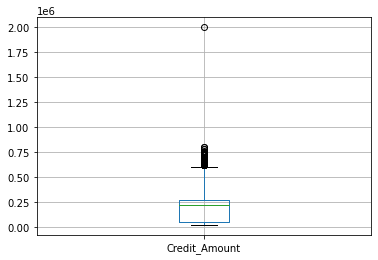

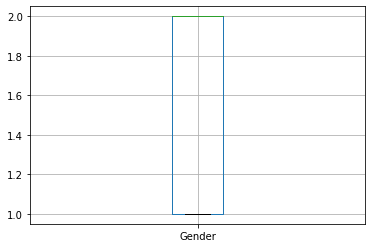

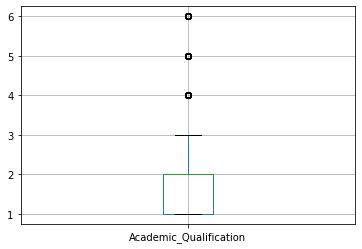

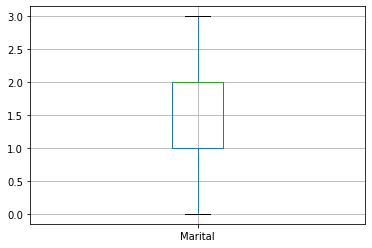

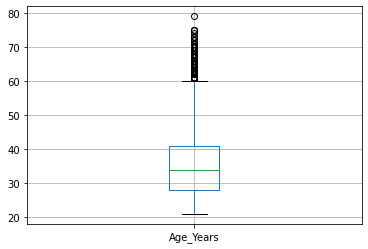

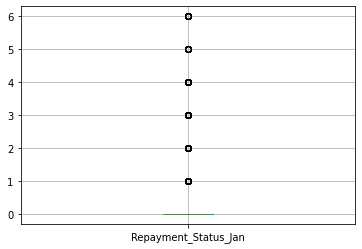

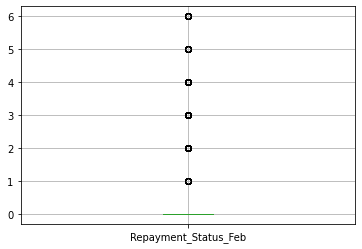

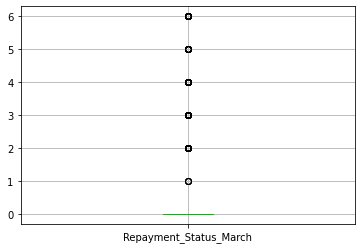

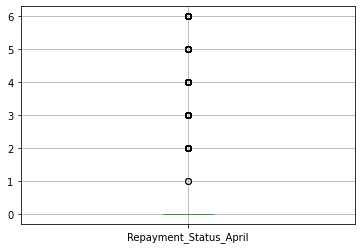

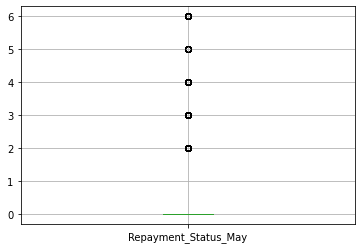

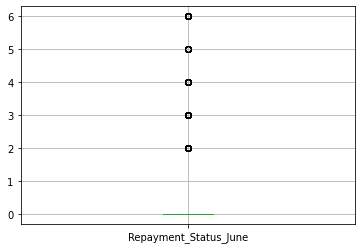

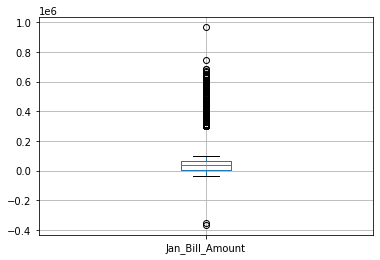

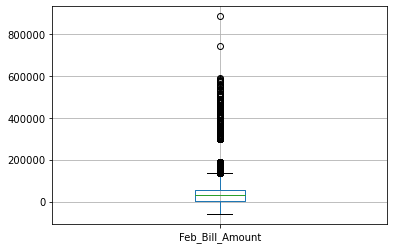

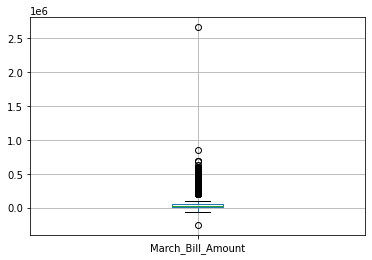

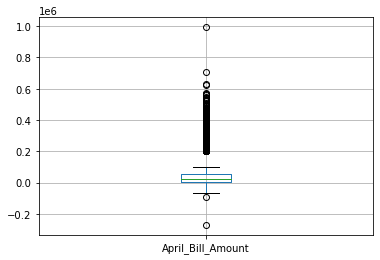

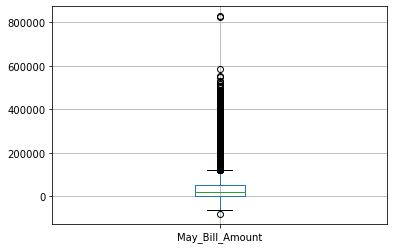

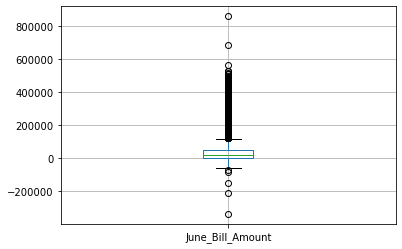

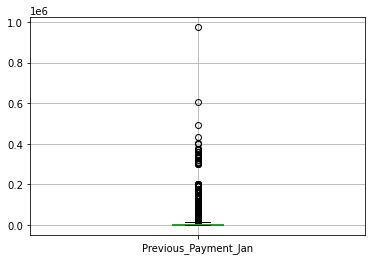

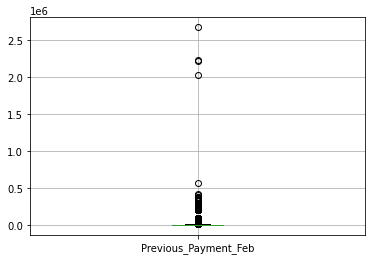

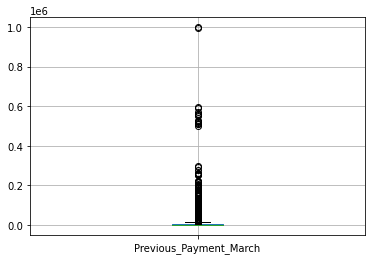

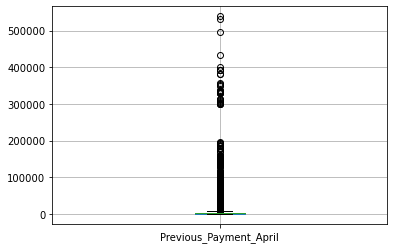

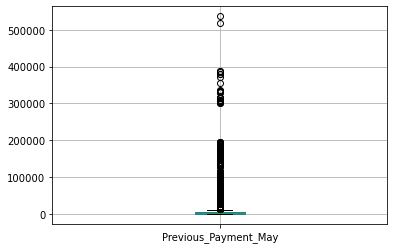

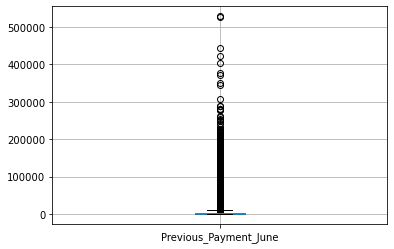

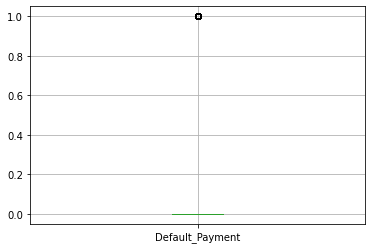

In [9]:
#checking for outliers
import matplotlib.pyplot as plt
colname=[]
for x in credit_df_rev.columns:
    if credit_df_rev[x].dtype=="int64" or credit_df_rev[x].dtype=="float64":
        colname.append(x)

for x in colname:
    credit_df_rev.boxplot(column=x)
    plt.show()

In [10]:
credit_df_rev.dtypes

Credit_Amount             float64
Gender                      int64
Academic_Qualification      int64
Marital                     int64
Age_Years                   int64
Repayment_Status_Jan        int64
Repayment_Status_Feb        int64
Repayment_Status_March      int64
Repayment_Status_April      int64
Repayment_Status_May        int64
Repayment_Status_June       int64
Jan_Bill_Amount           float64
Feb_Bill_Amount           float64
March_Bill_Amount         float64
April_Bill_Amount         float64
May_Bill_Amount           float64
June_Bill_Amount          float64
Previous_Payment_Jan      float64
Previous_Payment_Feb      float64
Previous_Payment_March    float64
Previous_Payment_April    float64
Previous_Payment_May      float64
Previous_Payment_June     float64
Default_Payment             int64
dtype: object

In [11]:
#Splitting data into X and Y
Y=credit_df_rev.values[:,-1]
X=credit_df_rev.values[:,0:-1]

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[-1.30714215  0.81016074  0.18135662 ... -0.29980379 -0.30967814
  -0.29338206]
 [ 0.20472737  0.81016074  0.18135662 ... -0.24133615 -0.30967814
  -0.18087821]
 [-0.77798782  0.81016074  0.18135662 ... -0.24133615 -0.2508173
  -0.01212243]
 ...
 [-1.23154867 -1.23432296  0.18135662 ... -0.04839293 -0.13309562
  -0.11900109]
 [-0.85358129 -1.23432296  1.4401948  ... -0.1866689   2.86674716
  -0.19190359]
 [-1.08036172 -1.23432296  0.18135662 ... -0.24133615 -0.2508173
  -0.23713013]]


In [13]:
Y=Y.astype(int)

### Base Model

In [28]:
#Model 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [29]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print()

print("classification report:")
print(classification_report(Y_test,Y_pred))

print()

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[6704  278]
 [1353  665]]

classification report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6982
           1       0.71      0.33      0.45      2018

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000


Accuracy of the model:  0.8187777777777778


### Adjusting Threshold

In [31]:
#Tuning Model- Adjusting Threshold as type2 error is more
# access the predicted probabilities on test data (probability matrix)
y_pred_prob = classifier.predict_proba(X_test)

for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1627  , type 2 error : 1215  , type 1 error: 412
Errors at threshold  0.41000000000000003 : 1621  , type 2 error : 1227  , type 1 error: 394
Errors at threshold  0.42000000000000004 : 1624  , type 2 error : 1240  , type 1 error: 384
Errors at threshold  0.43000000000000005 : 1617  , type 2 error : 1246  , type 1 error: 371
Errors at threshold  0.44000000000000006 : 1618  , type 2 error : 1258  , type 1 error: 360
Errors at threshold  0.45000000000000007 : 1627  , type 2 error : 1281  , type 1 error: 346
Errors at threshold  0.4600000000000001 : 1633  , type 2 error : 1295  , type 1 error: 338
Errors at threshold  0.4700000000000001 : 1630  , type 2 error : 1306  , type 1 error: 324
Errors at threshold  0.4800000000000001 : 1626  , type 2 error : 1324  , type 1 error: 302
Errors at threshold  0.4900000000000001 : 1632  , type 2 error : 1339  , type 1 error: 293
Errors at threshold  0.5000000000000001 : 1631  , type 2 error : 1353  , type 1 error: 278
Errors at

In [32]:
#checking for threshold at 0.41
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.41:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print()

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

print()

print(classification_report(Y_test, y_pred_class))

[[6588  394]
 [1227  791]]

Accuracy of the model:  0.8198888888888889

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6982
           1       0.67      0.39      0.49      2018

    accuracy                           0.82      9000
   macro avg       0.76      0.67      0.69      9000
weighted avg       0.80      0.82      0.80      9000



In [20]:
#checking for ROC curve- AUC for over all

from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1]) 
auc = metrics.auc(fpr,tpr)
print(auc)

0.76270575703799


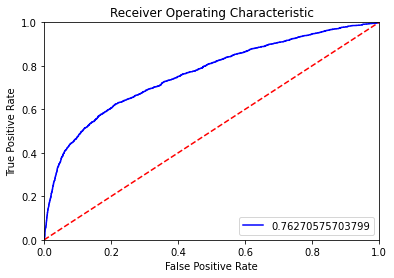

In [21]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [22]:
#AUC for 0.41 threshold


from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.6677707138191112
[0.         0.05643082 1.        ]
[0.         0.39197225 1.        ]


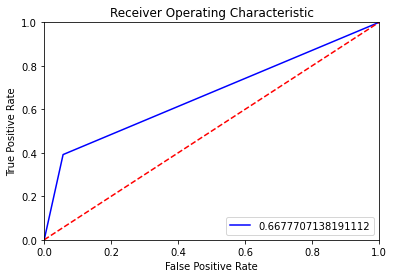

In [23]:
import matplotlib.pyplot as plt
#Blue curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')

#Red line
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

0.5
--------
[[6704  278]
 [1353  665]]

classification report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6982
           1       0.71      0.33      0.45      2018

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000


Accuracy of the model:  0.8187777777777778

0.41
-------
[[6588  394]
 [1227  791]]

Accuracy of the model:  0.8198888888888889

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6982
           1       0.67      0.39      0.49      2018

    accuracy                           0.82      9000
   macro avg       0.76      0.67      0.69      9000
weighted avg       0.80      0.82      0.80      9000

0.42
-------
[[6598  384]
 [1240  778]]

Accuracy of the model:  0.8195555555555556

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.67      0.39      0.49      2018

    accuracy                           0.82      9000
   macro avg       0.76      0.67      0.69      9000
weighted avg       0.80      0.82      0.80      9000


0.43
--------
[[6611  371]
 [1246  772]]

Accuracy of the model:  0.8203333333333334

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.68      0.38      0.49      2018

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000

0.44

[[6622  360]
 [1258  760]]

Accuracy of the model:  0.8202222222222222

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.68      0.38      0.48      2018

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000


0.45
------
[[6636  346]
 [1281  737]]

Accuracy of the model:  0.8192222222222222

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.68      0.37      0.48      2018

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000


0.46
----------
[[6644  338]
 [1295  723]]

Accuracy of the model:  0.8185555555555556

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.68      0.36      0.47      2018

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



AUC Values
------------------
AUC over all-0.76270575703799

0.41 -0.6677707138191112
0.42-0.665265830101416
0.43-0.6647101750246066
0.44-0.6625246740947058
0.45-0.6578285405569299
0.46-0.6549326613330213

Closest AUC we get is at 0.41. Hence we take optimum threshold as 0.41.

### Cross validation

In [24]:
#Model evaluation using CV

classifier=LogisticRegression() 
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10)

from sklearn.model_selection import cross_val_score
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,y=Y_train, cv=kfold_cv)
print(kfold_cv_result)


print(kfold_cv_result.mean())

[0.81190476 0.81238095 0.82904762 0.81428571 0.81142857 0.82761905
 0.82238095 0.82       0.81238095 0.81333333]
0.8174761904761905


CV accuracy : 0.8174761904761905
BM accuracy : 0.8187777777777778

Difference b/w CV and BM accuracy is < 3% difference hence we dont need to build model using CV.

### Stochastic Gradient Descent Method

In [25]:
#alpha: starting value
#eta0 : learning  rate

from sklearn.linear_model import SGDClassifier

classifier=SGDClassifier(loss="log",random_state=10,eta0=0.00001,alpha=0.01,max_iter=1000)
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [26]:
classifier.n_iter_

7

In [27]:
#Model Evaluation

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

accuracy_score=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",accuracy_score)

[[6737  245]
 [1414  604]]

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6982
           1       0.71      0.30      0.42      2018

    accuracy                           0.82      9000
   macro avg       0.77      0.63      0.66      9000
weighted avg       0.80      0.82      0.79      9000

Accuracy of the model:  0.8156666666666667


In [ ]:
'''Compared to BM with threshold 0.41, SGD has slightly less recall and accuracy values. Hence we ignore this model'''

### Storing predicted values of validation test data

In [34]:
new_df=pd.DataFrame()
new_df['Default_Payment']=Y_test

In [35]:
new_df['predicted_default_payment']=y_pred_class

In [36]:
new_df.head()

,Default_Payment,predicted_default_payment
0,0,0
1,0,1
2,0,0
3,0,0
4,1,0


In [37]:
new_df.to_excel(r"C:\Python Imarticus\Basics\Assignments\Logistic Regression\Credit card Defaulters\creditcard_defaulters_Prediction.xlsx",header=True,index=False)